<a href="https://colab.research.google.com/github/Elwing-Chou/online0421/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

In [16]:
# Step1. 資料切兩份
import numpy as np
from sklearn.model_selection import train_test_split
# 訓練模型之前(資料清洗/資料預處理): pandas
# 開始訓練模型之後: numpy
# 把資料切成兩分 a. 訓練資料 b. 驗證資料
x = np.array(df.drop("ans", axis=1))
y = np.array(df["ans"])
# x(90) x(10) y(90) y(10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [33]:
# Step2. 讓演算法吃訓練資料
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
# fit完以後就是妳的模型了
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.75\ngini = 0.665\nsamples = 135\nvalue = [46, 41, 48]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.497\nsamples = 89\nvalue = [0, 41, 48]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 45\nvalue = [0, 1, 44]\nclass = virginica')]

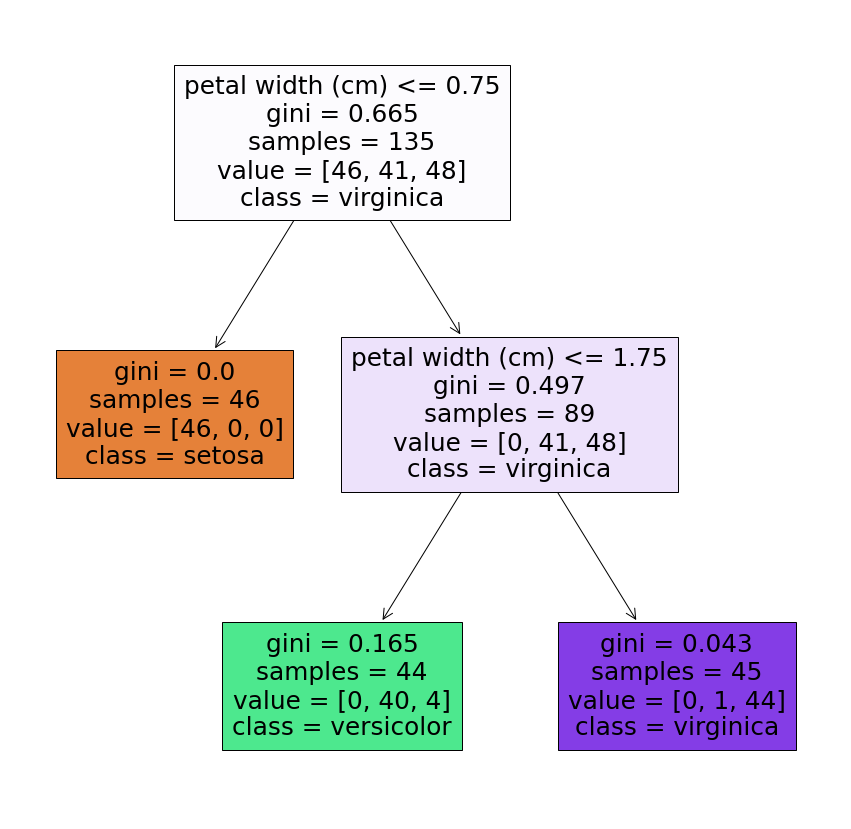

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[15, 15])
plot_tree(clf, 
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled=True)

In [36]:
# Step3. 驗證模型
# !!! 衡量方式: 普通時候(accuracy score) imbalanced(f1 score)
from sklearn.metrics import accuracy_score, f1_score
pre = clf.predict(x_test)
print(accuracy_score(y_test, pre))
print(f1_score(y_test, pre, average=None))

0.9333333333333333
[1.         0.94736842 0.66666667]
